## Bernoulli Naive Bayes with Count Vectorizer
**A Binary Classification Scenario**

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
pd.set_option('display.expand_frame_repr', False)
pd.options.display.max_colwidth = 1800
from pathlib import Path
import seaborn as sns
sns.set()
import plotly.express as px
from itertools import combinations
from scipy.special import comb
from IPython.display import IFrame


#Sklearn 
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.naive_bayes import MultinomialNB,BernoulliNB,CategoricalNB



from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import f1_score, precision_score, recall_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

import pymongo
from pymongo import MongoClient
import json
import dns


In [2]:
import sys
sys.path.append('./assets/')
from myStoppyStoppers import expl_list
from myStoppyStoppers import extra_stop_words

In [3]:
history_test = pd.DataFrame()

## How does it work?

**Overview of what is taking place**
1. designate the file
2. clear out index and set the target on the first artist
3. convert all the rest of artists to 'other'
4. return the dataframe

In [4]:
name=os.listdir('./data/')[0]
file='./data/'+name
#These variables will be the first file in the directory this is only for demo 
#later in the bottom we will simply 


#This function brings in the csv from a directory filepath combo. There is no specificity so it will 
#bring in anything and everything make sure these are all csvs with the index still on or modify 
#the code so that it reflects accordingly
def openfile(a):
    df=pd.read_csv(a, index_col=False)
    df.drop(columns=('Unnamed: 0'), inplace=True)
    target_string=df['artist'].iloc[0]
    #this will be used later in our documentation pandas dataframe
    merge_rappers=df.artist.unique().tolist()
    merge_rappers = [names for names in merge_rappers if names != target_string]
    df.loc[df.artist.isin(merge_rappers), 'artist'] = 'other'
    #all the the other categoricals will be turned into other
    return df

df=openfile(file)
#save it to a variable for examination

In [5]:
df.sample(10)

,artist,text
3623,other,I come apart and I can t stand the pressure
4158,other,Gotta find my way back home
6130,other,Air Tech Challenge clay court checks balance
9210,other,But it still dont explain the love that you have for me
4845,other,Bitches blowing on my dick like a cartridge
1562,other,I said her pistol go bang bang boom boom pop pop
4551,other,I m a hero in my home town baby
7931,other,Fuckin on the low smokin on the low
76,A$AP Ant,I dont wanna tell you again
8479,other,Thought of things that you shoulda said said things that you shouldn t say


**Overview of what is taking place**
1. get_targ_string -- The first function gives us our target in a string
2. def dataframe_deets-- For our purposes here we will do a bit of sanity check to make sure what we have is what we want. These are just some essential details that will help shed insight on what we actually are dealing with.

In [6]:
def get_targ_string(a):
    target_string=a.iloc[0]
    return target_string

target_string=get_targ_string(df['artist'])


def dataframe_deets(a):
    meow=a.unique().tolist()
    sizecheck=a.shape[0]
    meowmeow=a.value_counts()
    print(f'check to see if the targets are converted: {meow} \
        \n\nthe file is {sizecheck} rows long.\n\nHere are the value counts:\n{meowmeow}')

dataframe_deets(df.artist)

check to see if the targets are converted: ['A$AP Ant', 'other']         

the file is 10130 rows long.

Here are the value counts:
other       9022
A$AP Ant    1108
Name: artist, dtype: int64


**Overview of what is taking place**
1. First we binarize the artists 
2. Because artist could be a word in the lyrics we will call them floggityflog

In [7]:
def prepit(a):
    a = np.where(a == target_string, 1, 0)
    df.rename(columns={'artist': 'floggityflog'}, inplace=True)
prepit(df['artist'])

In [8]:
df.head()

,floggityflog,text
0,A$AP Ant,Triple beam for the weight
1,A$AP Ant,Cut the middle man tryna get white bitches
2,A$AP Ant,Snorting off the plate coke from Colombia
3,A$AP Ant,Riding round in the Benz looking like a trap star
4,A$AP Ant,Flipping raw day and night


**Overview**

With smaller samples, Bernoulli Naive Bayes gives more accurate and precise predictions as oppossed to other models. I choose it for speed and the fact that it really gives quick predictions. 

In relation to the text data here we have selected Count Vectorizer as our tokenizer. TfidfVectorizer() assigns a score while CountVectorizer() counts and after careful evaluation of both. I decided to go with Count Vecortizer you can easily modify this.

In [9]:
def gridsearchy(a,b):
    my_stop_words = text.ENGLISH_STOP_WORDS.union(extra_stop_words)
    X = df['text'] 
    y = df['floggityflog']
    X_train, X_test, y_train, y_test = train_test_split(X,
                                                        y,
                                                        test_size=0.33,
                                                        stratify=y,
                                                        random_state=42)
    cvec = CountVectorizer(stop_words=my_stop_words)
    pipe = Pipeline([
        ('cvec', CountVectorizer()),
        ('bnb', BernoulliNB())
    ])

    pipe_params = {
        'cvec__max_features': [1_500, 5_000, 12_000, 20_000],
        'cvec__min_df': [2, 3],
        'cvec__max_df': [.9, .95],
        'cvec__ngram_range': [(1,1), (1,2),(2,2)],
        'bnb__alpha': [0.01, 0.1, 0.5, 1.0, 10.0],
    }
    gs = GridSearchCV(pipe, 
                      param_grid=pipe_params, 
                      cv=5) 
    gs.fit(X_train, y_train)
    bestparms=gs.best_params_
    return bestparms

In [10]:
bestparamies=gridsearchy(df['text'],df['floggityflog'])
bestparamies

{'bnb__alpha': 0.5,
 'cvec__max_df': 0.9,
 'cvec__max_features': 12000,
 'cvec__min_df': 2,
 'cvec__ngram_range': (1, 2)}

**Overview**

We have our stop words in a py file. It just is annoying to look at a big list so organizing it somewhere for later use is just a good idea. So now that we have our best params we can simply pass it to the model and get our classification report that we will out put as a dictionary to convert to dataframe. 

In [11]:
extra_stop_words=expl_list+extra_stop_words
my_stop_words = text.ENGLISH_STOP_WORDS.union(extra_stop_words)

In [12]:
def run_mod(a,b,c):
    X = a
    y = b
    X_train, X_test, y_train, y_test = train_test_split(X,
                                                        y,
                                                        test_size=0.33,
                                                        stratify=y,
                                                        random_state=42)
    cvec = CountVectorizer(stop_words=my_stop_words)
    bnb = BernoulliNB()
    pipe = Pipeline([
        ('cvec', CountVectorizer()),
        ('bnb', BernoulliNB())
    ])
    pipe_params = c
    pipe.fit(X_train, y_train)
    preds = pipe.predict(X_test)
    return classification_report(y_test,preds, output_dict=True)

In [13]:
new_report=run_mod(df['text'],df['floggityflog'],bestparamies)
one = pd.DataFrame(new_report).transpose()
one

,precision,recall,f1-score,support
A$AP Ant,0.974359,0.103825,0.187654,366.000000
other,0.900726,0.999664,0.947620,2977.000000
accuracy,0.901585,0.901585,0.901585,0.901585
macro avg,0.937543,0.551745,0.567637,3343.000000
weighted avg,0.908788,0.901585,0.864417,3343.000000


This could be done as dictionary but honestly it is easier to use loc to figure out what you want and what to leave behind. Plus it offers no help in this instance when you want people to visualize what was actually produced. 

In [14]:
def results(a):
    target_score=a['precision'].iloc[0]
    other_score=a['precision'].iloc[1]
    accuracy=a['precision'].iloc[2]
    dicty={'artist':target_string,
           'other_score':other_score,
          'target_score':target_score,
          'accuracy':accuracy}
    return dicty

one_dict=results(one)

**Now just append it to our empty dataframe and we have our first test subject.** This should have clarified what we are doing. 

In [15]:
history_test = history_test.append(one_dict, ignore_index=True)
history_test

,accuracy,artist,other_score,target_score
0,0.901585,A$AP Ant,0.900726,0.974359


## Lets Do Them All!

This function is literally everything above in a simple for loop using Path.glob('*'). This means that anything in the directory is going to be subject to the function make sure that the directory is clear of anything but files that are formatted for the process.

In [16]:
#We can iterate over files in a directory using Path.glob() function which glob the specified pattern in the given directory and yields the matching files.
#Path.glob(‘*’) yield all the files in the given directory
#modified from: https://www.geeksforgeeks.org/how-to-iterate-over-files-in-directory-using-python/
history = pd.DataFrame()

directory = './data/'
files = Path(directory).glob('*')
for each in files:
    df=openfile(each)    
    target_string=get_targ_string(df['artist'])
    prepit(df['artist'])
    new_report=run_mod(df['text'],df['floggityflog'],bestparamies)
    each = pd.DataFrame(new_report).transpose()
    each=results(each)
    history = history.append(each, ignore_index=True)
    print(each)

{'artist': 'A$AP Ant', 'other_score': 0.9007263922518159, 'target_score': 0.9743589743589743, 'accuracy': 0.9015854023332336}
{'artist': 'A$AP Ant', 'other_score': 0.8818316100443131, 'target_score': 0.92, 'accuracy': 0.8825235678027556}
{'artist': 'A$AP Ant', 'other_score': 0.9096598639455782, 'target_score': 1.0, 'accuracy': 0.9104880021569156}
{'artist': 'A$AP Ant', 'other_score': 0.9108505997818975, 'target_score': 1.0, 'accuracy': 0.9117885082276773}
{'artist': 'A$AP Ant', 'other_score': 0.9069440539780714, 'target_score': 0.9722222222222222, 'accuracy': 0.907598107431116}
{'artist': 'A$AP Ant', 'other_score': 0.9018351296242354, 'target_score': 0.9354838709677419, 'accuracy': 0.9021362586605081}
{'artist': 'A$AP Ant', 'other_score': 0.908485856905158, 'target_score': 0.972972972972973, 'accuracy': 0.909140818007137}
{'artist': 'A$AP Ant', 'other_score': 0.9106463878326996, 'target_score': 0.9487179487179487, 'accuracy': 0.9110454178984144}
{'artist': 'A$AP Ant', 'other_score': 0.

{'artist': 'A$AP Ant', 'other_score': 0.8779026217228464, 'target_score': 0.9302325581395349, 'accuracy': 0.8787320309620347}
{'artist': 'A$AP Ant', 'other_score': 0.9146748907735801, 'target_score': 1.0, 'accuracy': 0.9154140127388535}
{'artist': 'A$AP Ant', 'other_score': 0.9214457831325301, 'target_score': 0.9090909090909091, 'accuracy': 0.9213161659513591}
{'artist': 'A$AP Ant', 'other_score': 0.9206888188212466, 'target_score': 0.9512195121951219, 'accuracy': 0.9209894332372719}
{'artist': 'A$AP Ant', 'other_score': 0.91765597373074, 'target_score': 0.975609756097561, 'accuracy': 0.91825}
{'artist': 'A$AP Ant', 'other_score': 0.9030159668835009, 'target_score': 1.0, 'accuracy': 0.904093567251462}
{'artist': 'A$AP Ant', 'other_score': 0.9169354838709678, 'target_score': 0.9827586206896551, 'accuracy': 0.9179460031762837}
{'artist': 'A$AP Ant', 'other_score': 0.9073033707865169, 'target_score': 0.972972972972973, 'accuracy': 0.9079788712816236}
{'artist': 'A$AP Ant', 'other_score': 

{'artist': 'A$AP Ant', 'other_score': 0.9187530682376043, 'target_score': 1.0, 'accuracy': 0.919445120467267}
{'artist': 'A$AP Ant', 'other_score': 0.8803585346843336, 'target_score': 0.9365079365079365, 'accuracy': 0.8817040699885889}
{'artist': 'A$AP Ant', 'other_score': 0.9164316841835427, 'target_score': 0.975609756097561, 'accuracy': 0.9170471841704718}
{'artist': 'A$AP Ant', 'other_score': 0.8773510971786834, 'target_score': 0.8983050847457628, 'accuracy': 0.8778245882803524}
{'artist': 'A$AP Ant', 'other_score': 0.9108856594461201, 'target_score': 1.0, 'accuracy': 0.9118763557483731}
{'artist': 'A$AP Ant', 'other_score': 0.9156687898089172, 'target_score': 1.0, 'accuracy': 0.9164141414141415}
{'artist': 'A$AP Ant', 'other_score': 0.8735083532219571, 'target_score': 0.9411764705882353, 'accuracy': 0.8748538011695907}
{'artist': 'A$AP Ant', 'other_score': 0.9124597207303974, 'target_score': 0.975609756097561, 'accuracy': 0.9131474103585657}
{'artist': 'A$AP Ant', 'other_score': 0.

{'artist': 'A$AP Ant', 'other_score': 0.891863332159211, 'target_score': 0.9365079365079365, 'accuracy': 0.8928325292901448}
{'artist': 'A$AP Ant', 'other_score': 0.9153766769865841, 'target_score': 0.9743589743589743, 'accuracy': 0.9159642401021711}
{'artist': 'A$AP Ant', 'other_score': 0.9185148268128582, 'target_score': 0.975, 'accuracy': 0.919072292129287}
{'artist': 'A$AP Ant', 'other_score': 0.9251422070534698, 'target_score': 0.9736842105263158, 'accuracy': 0.9255583126550868}
{'artist': 'A$AP Ant', 'other_score': 0.8917870990482905, 'target_score': 0.9833333333333333, 'accuracy': 0.8936831204694512}
{'artist': 'A$AP Ant', 'other_score': 0.9166460549097205, 'target_score': 1.0, 'accuracy': 0.9172396856581533}
{'artist': 'A$AP Ant', 'other_score': 0.8937150378413952, 'target_score': 0.8958333333333334, 'accuracy': 0.8937479753806284}
{'artist': 'A$AP Ant', 'other_score': 0.8909348441926346, 'target_score': 1.0, 'accuracy': 0.8931297709923665}
{'artist': 'A$AP Ant', 'other_score':

{'artist': 'A$AP Rocky', 'other_score': 0.78766544635314, 'target_score': 0.7728459530026109, 'accuracy': 0.78622267412303}
{'artist': 'A$AP Rocky', 'other_score': 0.8120772946859903, 'target_score': 0.8580441640378549, 'accuracy': 0.8153466457258245}
{'artist': 'A$AP Rocky', 'other_score': 0.7934571666204602, 'target_score': 0.8090185676392573, 'accuracy': 0.794929718875502}
{'artist': 'A$AP Rocky', 'other_score': 0.7855567805953694, 'target_score': 0.8192771084337349, 'accuracy': 0.7883838383838384}
{'artist': 'A$AP Rocky', 'other_score': 0.7987851176917237, 'target_score': 0.8018867924528302, 'accuracy': 0.7990161630358398}
{'artist': 'A$AP Rocky', 'other_score': 0.7576636288318144, 'target_score': 0.7828282828282829, 'accuracy': 0.7626329787234043}
{'artist': 'A$AP Rocky', 'other_score': 0.8083074719503461, 'target_score': 0.8260869565217391, 'accuracy': 0.8094919786096256}
{'artist': 'A$AP Rocky', 'other_score': 0.7538784067085954, 'target_score': 0.7691029900332226, 'accuracy': 0

{'artist': 'A$AP Rocky', 'other_score': 0.8252900232018562, 'target_score': 0.7734375, 'accuracy': 0.8210481465700895}
{'artist': 'A$AP Rocky', 'other_score': 0.7677707480461481, 'target_score': 0.7888888888888889, 'accuracy': 0.7713046172916022}
{'artist': 'A$AP Rocky', 'other_score': 0.7842401500938087, 'target_score': 0.7792207792207793, 'accuracy': 0.7836065573770492}
{'artist': 'A$AP Rocky', 'other_score': 0.7741385192766974, 'target_score': 0.7775551102204409, 'accuracy': 0.7746355685131195}
{'artist': 'A$AP Rocky', 'other_score': 0.8193655303030303, 'target_score': 0.8592814371257484, 'accuracy': 0.8222904782799474}
{'artist': 'A$AP Rocky', 'other_score': 0.7842592592592592, 'target_score': 0.7288135593220338, 'accuracy': 0.7560199909132213}
{'artist': 'A$AP Rocky', 'other_score': 0.8162859980139027, 'target_score': 0.8201058201058201, 'accuracy': 0.8166137085792101}
{'artist': 'A$AP Rocky', 'other_score': 0.7548758865248227, 'target_score': 0.7611026033690659, 'accuracy': 0.756

{'artist': 'A$AP Rocky', 'other_score': 0.8170294187993303, 'target_score': 0.811965811965812, 'accuracy': 0.8166372462488968}
{'artist': 'A$AP Rocky', 'other_score': 0.8059113300492611, 'target_score': 0.8264984227129337, 'accuracy': 0.8074023303632625}
{'artist': 'A$AP Rocky', 'other_score': 0.829045643153527, 'target_score': 0.8339483394833949, 'accuracy': 0.8293066195246513}
{'artist': 'A$AP Rocky', 'other_score': 0.8137347130761995, 'target_score': 0.8431372549019608, 'accuracy': 0.8157086441421676}
{'artist': 'A$AP Rocky', 'other_score': 0.8307630682956139, 'target_score': 0.8367346938775511, 'accuracy': 0.8310423825887744}
{'artist': 'A$AP Rocky', 'other_score': 0.8267581475128645, 'target_score': 0.88, 'accuracy': 0.8297226159141526}
{'artist': 'A$AP Rocky', 'other_score': 0.8548983364140481, 'target_score': 0.6965678627145085, 'accuracy': 0.7690355329949239}
{'artist': 'A$AP Rocky', 'other_score': 0.8521665250637214, 'target_score': 0.7512864493996569, 'accuracy': 0.8019632949

{'artist': 'Action Bronson', 'other_score': 0.8227194492254734, 'target_score': 0.7538461538461538, 'accuracy': 0.819568277803848}
{'artist': 'Action Bronson', 'other_score': 0.8159333506899245, 'target_score': 0.8131313131313131, 'accuracy': 0.8157959891062144}
{'artist': 'Action Bronson', 'other_score': 0.7646586345381526, 'target_score': 0.8269794721407625, 'accuracy': 0.772165312610385}
{'artist': 'Action Bronson', 'other_score': 0.7701335491703764, 'target_score': 0.7915567282321899, 'accuracy': 0.7729824561403509}
{'artist': 'Action Bronson', 'other_score': 0.818762781186094, 'target_score': 0.8324607329842932, 'accuracy': 0.8194004387033877}
{'artist': 'Action Bronson', 'other_score': 0.8111548954228555, 'target_score': 0.8249158249158249, 'accuracy': 0.8122914349276974}
{'artist': 'Action Bronson', 'other_score': 0.8206767918998135, 'target_score': 0.8091286307053942, 'accuracy': 0.8199799699549324}
{'artist': 'Action Bronson', 'other_score': 0.8327822390174776, 'target_score':

{'artist': 'Action Bronson', 'other_score': 0.830947511929107, 'target_score': 0.8671328671328671, 'accuracy': 0.8320862676056338}
{'artist': 'Action Bronson', 'other_score': 0.8272058823529411, 'target_score': 0.8529411764705882, 'accuracy': 0.8279857397504456}
{'artist': 'Action Bronson', 'other_score': 0.7910757523348322, 'target_score': 0.825, 'accuracy': 0.7944565555901588}
{'artist': 'Action Bronson', 'other_score': 0.8262302801977867, 'target_score': 0.8280254777070064, 'accuracy': 0.8262942779291553}
{'artist': 'Action Bronson', 'other_score': 0.8223684210526315, 'target_score': 0.8484848484848485, 'accuracy': 0.8231540565177757}
{'artist': 'Action Bronson', 'other_score': 0.8202087286527514, 'target_score': 0.8461538461538461, 'accuracy': 0.8209848136217212}
{'artist': 'Action Bronson', 'other_score': 0.7743988684582744, 'target_score': 0.8098591549295775, 'accuracy': 0.7776349614395887}
{'artist': 'Action Bronson', 'other_score': 0.7978142076502732, 'target_score': 0.76388888

{'artist': 'Action Bronson', 'other_score': 0.8095238095238095, 'target_score': 0.8275862068965517, 'accuracy': 0.811376363100501}
{'artist': 'Action Bronson', 'other_score': 0.8295911132120066, 'target_score': 0.7945945945945946, 'accuracy': 0.828125}
{'artist': 'Action Bronson', 'other_score': 0.8067908653846154, 'target_score': 0.8687258687258688, 'accuracy': 0.8112628937831057}
{'artist': 'Action Bronson', 'other_score': 0.8168229777256741, 'target_score': 0.8181818181818182, 'accuracy': 0.8169317875438123}
{'artist': 'Action Bronson', 'other_score': 0.8062953995157385, 'target_score': 0.8, 'accuracy': 0.8057954862078573}
{'artist': 'Action Bronson', 'other_score': 0.8288582769087088, 'target_score': 0.7941176470588235, 'accuracy': 0.8275320008982708}
{'artist': 'Action Bronson', 'other_score': 0.7950472466601499, 'target_score': 0.8415492957746479, 'accuracy': 0.7989859827020579}
{'artist': 'Action Bronson', 'other_score': 0.8328145842596709, 'target_score': 0.8467153284671532, 'a

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


{'artist': 'André 3000', 'other_score': 0.9649973074851912, 'target_score': 0.0, 'accuracy': 0.9644779332615716}
{'artist': 'André 3000', 'other_score': 0.9617196702002355, 'target_score': 0.0, 'accuracy': 0.96087084436599}
{'artist': 'André 3000', 'other_score': 0.9689366786140979, 'target_score': 0.0, 'accuracy': 0.9677804295942721}
{'artist': 'André 3000', 'other_score': 0.9693540782649693, 'target_score': 0.0, 'accuracy': 0.9688972667295005}
{'artist': 'André 3000', 'other_score': 0.9650631550658425, 'target_score': 0.0, 'accuracy': 0.9640268456375839}


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


{'artist': 'André 3000', 'other_score': 0.9670301800659397, 'target_score': 0.0, 'accuracy': 0.9670301800659397}
{'artist': 'André 3000', 'other_score': 0.9544498948843728, 'target_score': 0.0, 'accuracy': 0.9537815126050421}
{'artist': 'André 3000', 'other_score': 0.954337899543379, 'target_score': 0.0, 'accuracy': 0.9496679482698357}
{'artist': 'André 3000', 'other_score': 0.9484, 'target_score': 0.05263157894736842, 'accuracy': 0.9416435093290988}
{'artist': 'André 3000', 'other_score': 0.9420160570918823, 'target_score': 0.0, 'accuracy': 0.9370008873114463}
{'artist': 'André 3000', 'other_score': 0.956021650879567, 'target_score': 0.0, 'accuracy': 0.956021650879567}


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metr

{'artist': 'André 3000', 'other_score': 0.9590680100755667, 'target_score': 0.0, 'accuracy': 0.9590680100755667}
{'artist': 'André 3000', 'other_score': 0.9590606156775627, 'target_score': 1.0, 'accuracy': 0.9590736040609137}


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


{'artist': 'André 3000', 'other_score': 0.9582798459563543, 'target_score': 0.0, 'accuracy': 0.9582798459563543}
{'artist': 'André 3000', 'other_score': 0.9614357757342035, 'target_score': 0.0, 'accuracy': 0.9591595146493045}
{'artist': 'André 3000', 'other_score': 0.9648268398268398, 'target_score': 0.0, 'accuracy': 0.9637837837837838}
{'artist': 'André 3000', 'other_score': 0.9677659310686834, 'target_score': 0.0, 'accuracy': 0.9675260287555776}


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


{'artist': 'André 3000', 'other_score': 0.9616632261869655, 'target_score': 0.0, 'accuracy': 0.9616632261869655}
{'artist': 'André 3000', 'other_score': 0.9617422012948793, 'target_score': 0.0, 'accuracy': 0.9603291213635028}
{'artist': 'André 3000', 'other_score': 0.9454083791790098, 'target_score': 0.16666666666666666, 'accuracy': 0.9434360489658083}
{'artist': 'André 3000', 'other_score': 0.9635343618513323, 'target_score': 0.0, 'accuracy': 0.9635343618513323}


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


{'artist': 'André 3000', 'other_score': 0.959727385377943, 'target_score': 0.0, 'accuracy': 0.9588362735995049}
{'artist': 'André 3000', 'other_score': 0.9628359062321327, 'target_score': 0.0, 'accuracy': 0.961736150770988}
{'artist': 'André 3000', 'other_score': 0.9602324869990823, 'target_score': 0.0, 'accuracy': 0.9570121951219512}
{'artist': 'André 3000', 'other_score': 0.9570247933884297, 'target_score': 0.0, 'accuracy': 0.955130320026394}
{'artist': 'André 3000', 'other_score': 0.9635956314757771, 'target_score': 0.0, 'accuracy': 0.962248322147651}
{'artist': 'André 3000', 'other_score': 0.9648363538003787, 'target_score': 0.0, 'accuracy': 0.9640540540540541}
{'artist': 'André 3000', 'other_score': 0.9659774928029312, 'target_score': 0.0, 'accuracy': 0.9652196652719666}
{'artist': 'André 3000', 'other_score': 0.9719464825205006, 'target_score': 0.0, 'accuracy': 0.9717367853290183}
{'artist': 'André 3000', 'other_score': 0.9468737229260319, 'target_score': 0.0, 'accuracy': 0.93919

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


{'artist': 'André 3000', 'other_score': 0.9716095217296353, 'target_score': 0.0, 'accuracy': 0.9716095217296353}


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


{'artist': 'André 3000', 'other_score': 0.9722400170830664, 'target_score': 0.0, 'accuracy': 0.9722400170830664}
{'artist': 'André 3000', 'other_score': 0.94831013916501, 'target_score': 0.0, 'accuracy': 0.9426877470355731}


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


{'artist': 'André 3000', 'other_score': 0.965081923180231, 'target_score': 0.0, 'accuracy': 0.965081923180231}
{'artist': 'André 3000', 'other_score': 0.9631519274376418, 'target_score': 0.0, 'accuracy': 0.962333616539224}
{'artist': 'André 3000', 'other_score': 0.9492525570416994, 'target_score': 0.1111111111111111, 'accuracy': 0.9462955703645629}
{'artist': 'André 3000', 'other_score': 0.9465899753492194, 'target_score': 0.0, 'accuracy': 0.9450369155045119}
{'artist': 'André 3000', 'other_score': 0.9625468164794008, 'target_score': 0.0, 'accuracy': 0.9619925136769364}
{'artist': 'André 3000', 'other_score': 0.9511828764551258, 'target_score': 0.0, 'accuracy': 0.949400299850075}


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


{'artist': 'André 3000', 'other_score': 0.966373512674599, 'target_score': 0.0, 'accuracy': 0.966373512674599}
{'artist': 'André 3000', 'other_score': 0.9475383373688459, 'target_score': 0.0, 'accuracy': 0.9425933360096347}


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metr

{'artist': 'André 3000', 'other_score': 0.9624277456647399, 'target_score': 0.0, 'accuracy': 0.9624277456647399}
{'artist': 'André 3000', 'other_score': 0.962043795620438, 'target_score': 0.0, 'accuracy': 0.962043795620438}


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


{'artist': 'André 3000', 'other_score': 0.9701286764705882, 'target_score': 0.0, 'accuracy': 0.9699058120836205}
{'artist': 'André 3000', 'other_score': 0.9639789415350513, 'target_score': 0.0, 'accuracy': 0.9634450290778178}


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


{'artist': 'André 3000', 'other_score': 0.9657082563967291, 'target_score': 0.0, 'accuracy': 0.9657082563967291}
{'artist': 'André 3000', 'other_score': 0.9471329808865392, 'target_score': 0.0, 'accuracy': 0.9402503027856278}
{'artist': 'André 3000', 'other_score': 0.9675486769845232, 'target_score': 0.0, 'accuracy': 0.966824644549763}


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


{'artist': 'André 3000', 'other_score': 0.9678297451125959, 'target_score': 0.0, 'accuracy': 0.9678297451125959}
{'artist': 'André 3000', 'other_score': 0.9488188976377953, 'target_score': 0.0, 'accuracy': 0.9476995674400315}
{'artist': 'André 3000', 'other_score': 0.9507948523845572, 'target_score': 0.0, 'accuracy': 0.9497164461247637}
{'artist': 'André 3000', 'other_score': 0.9658703071672355, 'target_score': 0.0, 'accuracy': 0.9653634216741013}
{'artist': 'André 3000', 'other_score': 0.8881179531656548, 'target_score': 0.16666666666666666, 'accuracy': 0.8843830888697153}
{'artist': 'André 3000', 'other_score': 0.9461152882205514, 'target_score': 0.05263157894736842, 'accuracy': 0.9390799834231247}
{'artist': 'André 3000', 'other_score': 0.9612056102655924, 'target_score': 0.0, 'accuracy': 0.9574910820451843}
{'artist': 'André 3000', 'other_score': 0.9668536460989291, 'target_score': 0.0, 'accuracy': 0.9663608562691132}
{'artist': 'André 3000', 'other_score': 0.964940668824164, 'targ

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


{'artist': 'André 3000', 'other_score': 0.960996099609961, 'target_score': 0.0, 'accuracy': 0.9607078584283143}
{'artist': 'André 3000', 'other_score': 0.9631623689430433, 'target_score': 0.0, 'accuracy': 0.9628895184135977}
{'artist': 'André 3000', 'other_score': 0.964940668824164, 'target_score': 0.0, 'accuracy': 0.9644204851752022}
{'artist': 'André 3000', 'other_score': 0.9651567944250871, 'target_score': 0.0, 'accuracy': 0.9651567944250871}


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


{'artist': 'André 3000', 'other_score': 0.9645680021804306, 'target_score': 0.0, 'accuracy': 0.9643051771117166}
{'artist': 'André 3000', 'other_score': 0.9457755359394704, 'target_score': 0.1, 'accuracy': 0.9422352448723316}


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metr

{'artist': 'André 3000', 'other_score': 0.9670886075949368, 'target_score': 0.0, 'accuracy': 0.9670886075949368}
{'artist': 'André 3000', 'other_score': 0.9669631512071156, 'target_score': 0.0, 'accuracy': 0.9669631512071156}


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


{'artist': 'André 3000', 'other_score': 0.9478121236451225, 'target_score': 0.0, 'accuracy': 0.9413875598086124}
{'artist': 'André 3000', 'other_score': 0.9648268398268398, 'target_score': 0.0, 'accuracy': 0.9645658642142277}


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


{'artist': 'André 3000', 'other_score': 0.9656357388316151, 'target_score': 0.0, 'accuracy': 0.9656357388316151}
{'artist': 'André 3000', 'other_score': 0.9652777777777778, 'target_score': 0.0, 'accuracy': 0.9650200267022697}
{'artist': 'André 3000', 'other_score': 0.858085808580858, 'target_score': 0.5, 'accuracy': 0.8572996706915478}
{'artist': 'André 3000', 'other_score': 0.956738768718802, 'target_score': 0.0, 'accuracy': 0.9557845744680851}


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metr

{'artist': 'André 3000', 'other_score': 0.964354263778448, 'target_score': 0.0, 'accuracy': 0.964354263778448}
{'artist': 'André 3000', 'other_score': 0.9556918882072256, 'target_score': 0.0, 'accuracy': 0.9556918882072256}
{'artist': 'André 3000', 'other_score': 0.9617871840094062, 'target_score': 0.0, 'accuracy': 0.9606576629477392}
{'artist': 'André 3000', 'other_score': 0.9580780393421477, 'target_score': 0.0, 'accuracy': 0.9574605220754109}
{'artist': 'André 3000', 'other_score': 0.9397590361445783, 'target_score': 0.0, 'accuracy': 0.9384544192503471}
{'artist': 'André 3000', 'other_score': 0.9612612612612612, 'target_score': 0.25, 'accuracy': 0.9604079184163168}
{'artist': 'André 3000', 'other_score': 0.957010582010582, 'target_score': 0.0, 'accuracy': 0.9557463672391017}
{'artist': 'André 3000', 'other_score': 0.9649122807017544, 'target_score': 0.0, 'accuracy': 0.9649122807017544}


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


{'artist': 'André 3000', 'other_score': 0.9329173166926678, 'target_score': 0.2, 'accuracy': 0.9310165975103735}
{'artist': 'André 3000', 'other_score': 0.8976248976248976, 'target_score': 0.35714285714285715, 'accuracy': 0.891497975708502}
{'artist': 'André 3000', 'other_score': 0.9629840546697038, 'target_score': 0.0, 'accuracy': 0.9627099345288926}


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


{'artist': 'André 3000', 'other_score': 0.9664689192674748, 'target_score': 0.0, 'accuracy': 0.9664689192674748}
{'artist': 'André 3000', 'other_score': 0.9466942148760331, 'target_score': 0.0625, 'accuracy': 0.9408866995073891}
{'artist': 'André 3000', 'other_score': 0.9518836255128683, 'target_score': 0.06666666666666667, 'accuracy': 0.9469584569732937}
{'artist': 'André 3000', 'other_score': 0.9554336647240316, 'target_score': 0.0, 'accuracy': 0.954125299554947}
{'artist': 'André 3000', 'other_score': 0.972440110239559, 'target_score': 0.0, 'accuracy': 0.972027972027972}


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


{'artist': 'André 3000', 'other_score': 0.9739583333333334, 'target_score': 0.0, 'accuracy': 0.9739583333333334}
{'artist': 'André 3000', 'other_score': 0.9667434126375032, 'target_score': 0.0, 'accuracy': 0.9645227156712608}
{'artist': 'André 3000', 'other_score': 0.9501915708812261, 'target_score': 0.0, 'accuracy': 0.9451219512195121}
{'artist': 'André 3000', 'other_score': 0.967877440079071, 'target_score': 0.0, 'accuracy': 0.9673993578661398}
{'artist': 'André 3000', 'other_score': 0.964969011048235, 'target_score': 0.0, 'accuracy': 0.9644492324266092}
{'artist': 'André 3000', 'other_score': 0.9646354733405876, 'target_score': 0.0, 'accuracy': 0.9643731302692412}
{'artist': 'André 3000', 'other_score': 0.9645583424209379, 'target_score': 0.0, 'accuracy': 0.9637700898937619}
{'artist': 'André 3000', 'other_score': 0.960546282245827, 'target_score': 0.0, 'accuracy': 0.9582198001816531}
{'artist': 'André 3000', 'other_score': 0.9681372549019608, 'target_score': 0.0, 'accuracy': 0.9667

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metr

{'artist': 'André 3000', 'other_score': 0.9673366834170855, 'target_score': 0.0, 'accuracy': 0.9673366834170855}


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metr

{'artist': 'André 3000', 'other_score': 0.9692744032143701, 'target_score': 0.0, 'accuracy': 0.9692744032143701}


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


{'artist': 'André 3000', 'other_score': 0.9668789808917198, 'target_score': 0.0, 'accuracy': 0.9668789808917198}
{'artist': 'André 3000', 'other_score': 0.9544019642230797, 'target_score': 0.0, 'accuracy': 0.953732912723449}


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metr

{'artist': 'André 3000', 'other_score': 0.9679881802511696, 'target_score': 0.0, 'accuracy': 0.9679881802511696}


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


{'artist': 'André 3000', 'other_score': 0.9696899044066216, 'target_score': 0.0, 'accuracy': 0.9696899044066216}
{'artist': 'André 3000', 'other_score': 0.9523460410557185, 'target_score': 0.0, 'accuracy': 0.950256035113387}


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


{'artist': 'André 3000', 'other_score': 0.9639189564252012, 'target_score': 0.0, 'accuracy': 0.9639189564252012}
{'artist': 'André 3000', 'other_score': 0.9494556765163297, 'target_score': 0.0, 'accuracy': 0.9446808510638298}
{'artist': 'André 3000', 'other_score': 0.9677339290146438, 'target_score': 0.0, 'accuracy': 0.9658162001486252}
{'artist': 'André 3000', 'other_score': 0.9682772083943387, 'target_score': 0.0, 'accuracy': 0.9675688856376493}
{'artist': 'André 3000', 'other_score': 0.9694189602446484, 'target_score': 0.0, 'accuracy': 0.9682800751879699}
{'artist': 'André 3000', 'other_score': 0.9648268398268398, 'target_score': 0.0, 'accuracy': 0.9643050297458086}
{'artist': 'André 3000', 'other_score': 0.9558873430607397, 'target_score': 0.0, 'accuracy': 0.9520108144643461}
{'artist': 'André 3000', 'other_score': 0.9555478980013784, 'target_score': 0.07692307692307693, 'accuracy': 0.9516295025728988}
{'artist': 'André 3000', 'other_score': 0.96826171875, 'target_score': 0.0, 'acc

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metr

{'artist': 'André 3000', 'other_score': 0.971321420692698, 'target_score': 0.0, 'accuracy': 0.971321420692698}


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


{'artist': 'André 3000', 'other_score': 0.9679566181907814, 'target_score': 0.0, 'accuracy': 0.9679566181907814}
{'artist': 'André 3000', 'other_score': 0.9664342886651175, 'target_score': 0.0, 'accuracy': 0.9659354838709677}


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


{'artist': 'André 3000', 'other_score': 0.9695621634277687, 'target_score': 0.0, 'accuracy': 0.9695621634277687}
{'artist': 'André 3000', 'other_score': 0.9658882183154028, 'target_score': 0.0, 'accuracy': 0.964117338920901}
{'artist': 'André 3000', 'other_score': 0.953000723065799, 'target_score': 0.0, 'accuracy': 0.9516245487364621}
{'artist': 'André 3000', 'other_score': 0.9680354069338579, 'target_score': 0.0, 'accuracy': 0.9675595969525682}
{'artist': 'André 3000', 'other_score': 0.9224806201550387, 'target_score': 0.0, 'accuracy': 0.9197384066587396}
{'artist': 'André 3000', 'other_score': 0.9709562109025917, 'target_score': 0.0, 'accuracy': 0.970739334375698}
{'artist': 'André 3000', 'other_score': 0.9668198060234814, 'target_score': 0.0, 'accuracy': 0.9653414882772681}
{'artist': 'André 3000', 'other_score': 0.9585987261146497, 'target_score': 0.0, 'accuracy': 0.9576837416481069}


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


{'artist': 'André 3000', 'other_score': 0.9698585671226524, 'target_score': 0.0, 'accuracy': 0.9698585671226524}
{'artist': 'André 3000', 'other_score': 0.9689885496183206, 'target_score': 0.0, 'accuracy': 0.9687574528976867}
{'artist': 'André 3000', 'other_score': 0.9650912996777659, 'target_score': 0.0, 'accuracy': 0.9635388739946381}
{'artist': 'André 3000', 'other_score': 0.9646739130434783, 'target_score': 0.0, 'accuracy': 0.9631036353771025}
{'artist': 'André 3000', 'other_score': 0.9642562551553479, 'target_score': 0.0, 'accuracy': 0.9639912039582188}
{'artist': 'André 3000', 'other_score': 0.9463394342762064, 'target_score': 0.125, 'accuracy': 0.9436152570480929}
{'artist': 'André 3000', 'other_score': 0.946524064171123, 'target_score': 0.0, 'accuracy': 0.9430327868852459}
{'artist': 'Bas', 'other_score': 0.9777777777777777, 'target_score': 0.9567690557451649, 'accuracy': 0.9577922077922078}
{'artist': 'Bas', 'other_score': 0.8197716784066068, 'target_score': 0.8114754098360656

{'artist': 'Bas', 'other_score': 0.8186379928315413, 'target_score': 0.8723404255319149, 'accuracy': 0.8198177144192569}
{'artist': 'Bas', 'other_score': 0.8211171341032288, 'target_score': 0.9111111111111111, 'accuracy': 0.8229863835679667}
{'artist': 'Bas', 'other_score': 0.8287946428571429, 'target_score': 0.925, 'accuracy': 0.8304824561403509}
{'artist': 'Bas', 'other_score': 0.8250688705234159, 'target_score': 0.8586956521739131, 'accuracy': 0.8257643884892086}
{'artist': 'Bas', 'other_score': 0.8380506490742711, 'target_score': 0.8602150537634409, 'accuracy': 0.8384808013355592}
{'artist': 'Bas', 'other_score': 0.8374609781477628, 'target_score': 0.7792207792207793, 'accuracy': 0.836542400655469}
{'artist': 'Bas', 'other_score': 0.8253147482014388, 'target_score': 0.8421052631578947, 'accuracy': 0.8255968169761273}
{'artist': 'Bas', 'other_score': 0.8294732061762035, 'target_score': 0.8411214953271028, 'accuracy': 0.8297495012192418}
{'artist': 'Bas', 'other_score': 0.82683590208

{'artist': 'Bas', 'other_score': 0.812216052498738, 'target_score': 0.8362068965517241, 'accuracy': 0.8128984796468858}
{'artist': 'Bas', 'other_score': 0.8274193548387097, 'target_score': 0.7666666666666667, 'accuracy': 0.8257847533632287}
{'artist': 'Bas', 'other_score': 0.8204341670599339, 'target_score': 0.7843137254901961, 'accuracy': 0.8195852534562212}
{'artist': 'Bas', 'other_score': 0.8244972577696527, 'target_score': 0.8202247191011236, 'accuracy': 0.8244120940649496}
{'artist': 'Bas', 'other_score': 0.7675041876046901, 'target_score': 0.7819148936170213, 'accuracy': 0.7683580208005043}
{'artist': 'Bas', 'other_score': 0.8323170731707317, 'target_score': 0.7802197802197802, 'accuracy': 0.8313047191970959}
{'artist': 'Bas', 'other_score': 0.8224671669793621, 'target_score': 0.8, 'accuracy': 0.8219272144655527}
{'artist': 'Bas', 'other_score': 0.8325693080113512, 'target_score': 0.8222222222222222, 'accuracy': 0.8323699421965318}
{'artist': 'Bas', 'other_score': 0.7736398963730

{'artist': 'Big L', 'other_score': 0.8206429780033841, 'target_score': 0.8479087452471483, 'accuracy': 0.8256055363321799}
{'artist': 'Big L', 'other_score': 0.8175655761862658, 'target_score': 0.8427518427518428, 'accuracy': 0.8224387924887093}
{'artist': 'Big L', 'other_score': 0.8197504645606584, 'target_score': 0.812987012987013, 'accuracy': 0.8186026008375579}
{'artist': 'Big L', 'other_score': 0.8166311300639659, 'target_score': 0.8335949764521193, 'accuracy': 0.8188554960889255}
{'artist': 'Big L', 'other_score': 0.8296465222348917, 'target_score': 0.8242245199409158, 'accuracy': 0.8289213749506124}
{'artist': 'Big L', 'other_score': 0.8238877118644068, 'target_score': 0.8421052631578947, 'accuracy': 0.8269400352733686}
{'artist': 'Big L', 'other_score': 0.8307398307398307, 'target_score': 0.8583959899749374, 'accuracy': 0.8356870656803407}
{'artist': 'Big L', 'other_score': 0.8071227080394923, 'target_score': 0.832967032967033, 'accuracy': 0.8134009610250934}
{'artist': 'Big L'

{'artist': 'Big L', 'other_score': 0.8243880529979789, 'target_score': 0.8435483870967742, 'accuracy': 0.826729745712596}
{'artist': 'Big L', 'other_score': 0.8129233976029182, 'target_score': 0.8279266572637518, 'accuracy': 0.8152628106443809}
{'artist': 'Big L', 'other_score': 0.8222724987430869, 'target_score': 0.8470254957507082, 'accuracy': 0.82600341588386}
{'artist': 'Big L', 'other_score': 0.8028394779024502, 'target_score': 0.8345864661654135, 'accuracy': 0.8062869973463972}
{'artist': 'Big L', 'other_score': 0.7995373939861218, 'target_score': 0.8101135190918473, 'accuracy': 0.802413696323323}
{'artist': 'Big L', 'other_score': 0.8288682340076544, 'target_score': 0.7707847707847708, 'accuracy': 0.8048780487804879}
{'artist': 'Big L', 'other_score': 0.8295385855329438, 'target_score': 0.8138297872340425, 'accuracy': 0.8279355889270852}
{'artist': 'Big L', 'other_score': 0.8049353701527615, 'target_score': 0.8217993079584776, 'accuracy': 0.8069522036002483}
{'artist': 'Big L', 

{'artist': 'Big L', 'other_score': 0.8158195316961736, 'target_score': 0.8650065530799476, 'accuracy': 0.8246189917936694}
{'artist': 'Big L', 'other_score': 0.8282271241830066, 'target_score': 0.8482632541133455, 'accuracy': 0.8302406760977402}
{'artist': 'Big L', 'other_score': 0.8330944091746877, 'target_score': 0.8703374777975134, 'accuracy': 0.8369445464561146}
{'artist': 'Big L', 'other_score': 0.8237704918032787, 'target_score': 0.8564516129032258, 'accuracy': 0.8278132482043097}
{'artist': 'Big L', 'other_score': 0.8199543663140427, 'target_score': 0.8047882136279927, 'accuracy': 0.8184190902311708}
{'artist': 'Big L', 'other_score': 0.82411230388109, 'target_score': 0.8411483253588516, 'accuracy': 0.8292471877704067}
{'artist': 'Big L', 'other_score': 0.8042576721039536, 'target_score': 0.8480113636363636, 'accuracy': 0.8113862531821338}
{'artist': 'Big L', 'other_score': 0.8227040816326531, 'target_score': 0.8277467411545624, 'accuracy': 0.8242848803269118}
{'artist': 'Big L'

{'artist': 'Chance The Rapper', 'other_score': 0.8402422865795949, 'target_score': 0.8674698795180723, 'accuracy': 0.841071756285557}
{'artist': 'Chance The Rapper', 'other_score': 0.8164126611957796, 'target_score': 0.8408163265306122, 'accuracy': 0.8177383592017738}
{'artist': 'Chance The Rapper', 'other_score': 0.8229515516856442, 'target_score': 0.8828828828828829, 'accuracy': 0.8257817485641353}
{'artist': 'Chance The Rapper', 'other_score': 0.8154200230149597, 'target_score': 0.8303571428571429, 'accuracy': 0.8161523309258043}
{'artist': 'Chance The Rapper', 'other_score': 0.8110364015766288, 'target_score': 0.8564356435643564, 'accuracy': 0.8130675526024363}
{'artist': 'Chance The Rapper', 'other_score': 0.7959793534365661, 'target_score': 0.7547770700636943, 'accuracy': 0.7927409261576971}
{'artist': 'Chance The Rapper', 'other_score': 0.8281632653061225, 'target_score': 0.875, 'accuracy': 0.829715864246251}
{'artist': 'Chance The Rapper', 'other_score': 0.8060754000542446, 'ta

{'artist': 'Chance The Rapper', 'other_score': 0.7750497677504977, 'target_score': 0.8382749326145552, 'accuracy': 0.7819793205317578}
{'artist': 'Chance The Rapper', 'other_score': 0.7850408548082967, 'target_score': 0.8351648351648352, 'accuracy': 0.7901861252115059}
{'artist': 'Chance The Rapper', 'other_score': 0.7945544554455446, 'target_score': 0.669683257918552, 'accuracy': 0.735002157962883}
{'artist': 'Chance The Rapper', 'other_score': 0.8217037200088048, 'target_score': 0.8516746411483254, 'accuracy': 0.8230218855218855}
{'artist': 'Chance The Rapper', 'other_score': 0.8248035676364408, 'target_score': 0.8810810810810811, 'accuracy': 0.8269309358398038}
{'artist': 'Chance The Rapper', 'other_score': 0.7671781187458305, 'target_score': 0.8011049723756906, 'accuracy': 0.7708333333333334}
{'artist': 'Chance The Rapper', 'other_score': 0.8180327868852459, 'target_score': 0.844, 'accuracy': 0.8194690265486726}
{'artist': 'Chance The Rapper', 'other_score': 0.7418326693227092, 'ta

{'artist': 'Childish Gambino', 'other_score': 0.8148827726809378, 'target_score': 0.8200836820083682, 'accuracy': 0.8151244167962675}
{'artist': 'Childish Gambino', 'other_score': 0.7974559686888454, 'target_score': 0.7582417582417582, 'accuracy': 0.7942497753818508}
{'artist': 'Childish Gambino', 'other_score': 0.7604311543810849, 'target_score': 0.7531760435571688, 'accuracy': 0.7592646629705282}
{'artist': 'Childish Gambino', 'other_score': 0.8093136173030236, 'target_score': 0.7947019867549668, 'accuracy': 0.8084005793503001}
{'artist': 'Childish Gambino', 'other_score': 0.7670588235294118, 'target_score': 0.7667910447761194, 'accuracy': 0.7670179436058103}
{'artist': 'Childish Gambino', 'other_score': 0.7928376025864213, 'target_score': 0.7655367231638418, 'accuracy': 0.7906285714285715}
{'artist': 'Childish Gambino', 'other_score': 0.7900048053820279, 'target_score': 0.756578947368421, 'accuracy': 0.7877295118674429}
{'artist': 'Childish Gambino', 'other_score': 0.798423423423423

{'artist': 'Childish Gambino', 'other_score': 0.7611233827705901, 'target_score': 0.7728285077951003, 'accuracy': 0.7625760088446656}
{'artist': 'Childish Gambino', 'other_score': 0.8133635801196123, 'target_score': 0.7537878787878788, 'accuracy': 0.8102875024447487}
{'artist': 'Childish Gambino', 'other_score': 0.776038702333523, 'target_score': 0.7476415094339622, 'accuracy': 0.7729812087353987}
{'artist': 'Childish Gambino', 'other_score': 0.7679150693010911, 'target_score': 0.7304147465437788, 'accuracy': 0.7636601307189542}
{'artist': 'Childish Gambino', 'other_score': 0.8077163712200208, 'target_score': 0.8310502283105022, 'accuracy': 0.8087355404866374}
{'artist': 'Childish Gambino', 'other_score': 0.7712683078840761, 'target_score': 0.7855626326963907, 'accuracy': 0.7730978260869565}
{'artist': 'Childish Gambino', 'other_score': 0.767127592708988, 'target_score': 0.7642105263157895, 'accuracy': 0.7667487011211376}
{'artist': 'Childish Gambino', 'other_score': 0.8082935301780286

{'artist': 'Common', 'other_score': 0.7847188851513696, 'target_score': 0.7235494880546075, 'accuracy': 0.7806958473625141}
{'artist': 'Common', 'other_score': 0.7910265788831993, 'target_score': 0.7382352941176471, 'accuracy': 0.7869849133078135}
{'artist': 'Common', 'other_score': 0.793038570084666, 'target_score': 0.7284345047923323, 'accuracy': 0.7886089813800657}
{'artist': 'Common', 'other_score': 0.7660495311372926, 'target_score': 0.625, 'accuracy': 0.7590857142857143}
{'artist': 'Common', 'other_score': 0.7294727744165946, 'target_score': 0.75426944971537, 'accuracy': 0.7412935323383084}
{'artist': 'Common', 'other_score': 0.7736682307479988, 'target_score': 0.7933884297520661, 'accuracy': 0.7754641244355244}
{'artist': 'Common', 'other_score': 0.7729028697571744, 'target_score': 0.7460732984293194, 'accuracy': 0.7703444832750874}
{'artist': 'Common', 'other_score': 0.781563126252505, 'target_score': 0.7468354430379747, 'accuracy': 0.7790157845868152}
{'artist': 'Common', 'oth

{'artist': 'Common', 'other_score': 0.8063325563325563, 'target_score': 0.6342857142857142, 'accuracy': 0.8006763103513057}
{'artist': 'Common', 'other_score': 0.7942201270752204, 'target_score': 0.6011560693641619, 'accuracy': 0.7876088677751386}
{'artist': 'Common', 'other_score': 0.7987341772151899, 'target_score': 0.6754385964912281, 'accuracy': 0.7930756843800322}
{'artist': 'Common', 'other_score': 0.7230193387398628, 'target_score': 0.6162464985994398, 'accuracy': 0.7123210777434746}
{'artist': 'Common', 'other_score': 0.8008648648648649, 'target_score': 0.7030075187969925, 'accuracy': 0.7955428337763238}
{'artist': 'Common', 'other_score': 0.7910172272354389, 'target_score': 0.6267605633802817, 'accuracy': 0.7863690713431646}
{'artist': 'Common', 'other_score': 0.8048139158576052, 'target_score': 0.7295918367346939, 'accuracy': 0.8019455252918288}
{'artist': 'Common', 'other_score': 0.7267536704730831, 'target_score': 0.6501261564339781, 'accuracy': 0.6890269151138716}
{'artist

{'artist': 'CunninLynguists', 'other_score': 0.7793225480283115, 'target_score': 0.7976878612716763, 'accuracy': 0.7800920319689998}
{'artist': 'CunninLynguists', 'other_score': 0.8052002516250786, 'target_score': 0.6833333333333333, 'accuracy': 0.8022090407036204}
{'artist': 'CunninLynguists', 'other_score': 0.8099403578528827, 'target_score': 0.7051282051282052, 'accuracy': 0.8083398590446359}
{'artist': 'CunninLynguists', 'other_score': 0.804185351270553, 'target_score': 0.7899159663865546, 'accuracy': 0.8038317367763432}
{'artist': 'CunninLynguists', 'other_score': 0.7835149218379914, 'target_score': 0.6598639455782312, 'accuracy': 0.7793545433737697}
{'artist': 'CunninLynguists', 'other_score': 0.7840909090909091, 'target_score': 0.7248677248677249, 'accuracy': 0.7814491385414208}
{'artist': 'CunninLynguists', 'other_score': 0.7745454545454545, 'target_score': 0.6639344262295082, 'accuracy': 0.7713680244878738}
{'artist': 'CunninLynguists', 'other_score': 0.7686216283098243, 'targ

{'artist': 'CunninLynguists', 'other_score': 0.7868707030383677, 'target_score': 0.5952380952380952, 'accuracy': 0.7833659917265404}
{'artist': 'CunninLynguists', 'other_score': 0.8074454428754814, 'target_score': 0.7302631578947368, 'accuracy': 0.8050145047658517}
{'artist': 'CunninLynguists', 'other_score': 0.7975511927380199, 'target_score': 0.6046511627906976, 'accuracy': 0.79411154882853}
{'artist': 'CunninLynguists', 'other_score': 0.7972560975609756, 'target_score': 0.6896551724137931, 'accuracy': 0.7946049277824979}
{'artist': 'CunninLynguists', 'other_score': 0.7969543147208121, 'target_score': 0.8104265402843602, 'accuracy': 0.797608095676173}
{'artist': 'CunninLynguists', 'other_score': 0.7876484560570072, 'target_score': 0.78, 'accuracy': 0.7873853211009174}
{'artist': 'CunninLynguists', 'other_score': 0.8200459946339593, 'target_score': 0.5901639344262295, 'accuracy': 0.8147940074906367}
{'artist': 'CunninLynguists', 'other_score': 0.8101216163201256, 'target_score': 0.682

{'artist': 'Deniro Farrar', 'other_score': 0.8478172174622604, 'target_score': 0.7430340557275542, 'accuracy': 0.8413397129186603}
{'artist': 'Deniro Farrar', 'other_score': 0.8480383127647817, 'target_score': 0.8131313131313131, 'accuracy': 0.8468100231028968}
{'artist': 'Deniro Farrar', 'other_score': 0.8294117647058824, 'target_score': 0.8430232558139535, 'accuracy': 0.8304701627486437}
{'artist': 'Deniro Farrar', 'other_score': 0.8142747505755947, 'target_score': 0.7522750252780587, 'accuracy': 0.787521815008726}
{'artist': 'Deniro Farrar', 'other_score': 0.8322420410927974, 'target_score': 0.8526315789473684, 'accuracy': 0.833474756045821}
{'artist': 'Deniro Farrar', 'other_score': 0.8280145641464982, 'target_score': 0.8097345132743363, 'accuracy': 0.827170582226762}
{'artist': 'Deniro Farrar', 'other_score': 0.824, 'target_score': 0.8321678321678322, 'accuracy': 0.8245149911816578}
{'artist': 'Deniro Farrar', 'other_score': 0.7901512713228195, 'target_score': 0.7713625866050808, 

{'artist': 'Deniro Farrar', 'other_score': 0.848512173128945, 'target_score': 0.843298969072165, 'accuracy': 0.8460798460798461}
{'artist': 'Deniro Farrar', 'other_score': 0.8040089086859689, 'target_score': 0.690537084398977, 'accuracy': 0.7397392563978754}
{'artist': 'Deniro Farrar', 'other_score': 0.8153545019573728, 'target_score': 0.7611111111111111, 'accuracy': 0.8133110087902888}
{'artist': 'Deniro Farrar', 'other_score': 0.8225050234427328, 'target_score': 0.7925311203319502, 'accuracy': 0.8209745762711864}
{'artist': 'Deniro Farrar', 'other_score': 0.788207685538281, 'target_score': 0.7630057803468208, 'accuracy': 0.7858854860186418}
{'artist': 'Deniro Farrar', 'other_score': 0.784026622296173, 'target_score': 0.7439293598233996, 'accuracy': 0.7787738577212261}
{'artist': 'Deniro Farrar', 'other_score': 0.7899571341090018, 'target_score': 0.7564705882352941, 'accuracy': 0.7784937575513492}
{'artist': 'Drake', 'other_score': 0.819521623580575, 'target_score': 0.7341176470588235

{'artist': 'Drake', 'other_score': 0.8272672431128092, 'target_score': 0.7751937984496124, 'accuracy': 0.8246989103421908}
{'artist': 'Drake', 'other_score': 0.8181628392484342, 'target_score': 0.7642276422764228, 'accuracy': 0.8155281969817315}
{'artist': 'Drake', 'other_score': 0.7760593875657285, 'target_score': 0.7314410480349345, 'accuracy': 0.77052289352479}
{'artist': 'Drake', 'other_score': 0.8134598012646793, 'target_score': 0.7766666666666666, 'accuracy': 0.8111252115059222}
{'artist': 'Drake', 'other_score': 0.8132596685082873, 'target_score': 0.7328767123287672, 'accuracy': 0.8083869628399418}
{'artist': 'Drake', 'other_score': 0.8287363694676074, 'target_score': 0.7771084337349398, 'accuracy': 0.8253144340187663}
{'artist': 'Drake', 'other_score': 0.7776831345826235, 'target_score': 0.6501220504475184, 'accuracy': 0.7124427798585102}
{'artist': 'Drake', 'other_score': 0.8089045624862243, 'target_score': 0.7741935483870968, 'accuracy': 0.807105538140021}
{'artist': 'Drake',

{'artist': 'Earl Sweatshirt', 'other_score': 0.853400836451684, 'target_score': 0.935064935064935, 'accuracy': 0.8547619047619047}
{'artist': 'Earl Sweatshirt', 'other_score': 0.861783571280778, 'target_score': 0.9333333333333333, 'accuracy': 0.862876935615322}
{'artist': 'Earl Sweatshirt', 'other_score': 0.8362343711694042, 'target_score': 0.875, 'accuracy': 0.8369800432796345}
{'artist': 'Earl Sweatshirt', 'other_score': 0.8150987909171336, 'target_score': 0.8740157480314961, 'accuracy': 0.8172256964184196}
{'artist': 'Earl Sweatshirt', 'other_score': 0.8543774747030356, 'target_score': 0.95, 'accuracy': 0.8560311284046692}
{'artist': 'Earl Sweatshirt', 'other_score': 0.8135048231511254, 'target_score': 0.9345794392523364, 'accuracy': 0.8171768707482994}
{'artist': 'Earl Sweatshirt', 'other_score': 0.8523368706254233, 'target_score': 0.9032258064516129, 'accuracy': 0.8533834586466166}
{'artist': 'Earl Sweatshirt', 'other_score': 0.8516326977865439, 'target_score': 0.8840579710144928,

{'artist': 'Eazy-E', 'other_score': 0.8298363407469577, 'target_score': 0.8359133126934984, 'accuracy': 0.8302220475535469}
{'artist': 'Eazy-E', 'other_score': 0.7886202830188679, 'target_score': 0.7599164926931107, 'accuracy': 0.785068457762852}
{'artist': 'Eazy-E', 'other_score': 0.8313811615422158, 'target_score': 0.8423326133909287, 'accuracy': 0.8324928743696558}
{'artist': 'Eazy-E', 'other_score': 0.8295687885010267, 'target_score': 0.8633540372670807, 'accuracy': 0.8332952728933547}
{'artist': 'Eazy-E', 'other_score': 0.8353761115116558, 'target_score': 0.8461538461538461, 'accuracy': 0.8364657593432707}
{'artist': 'Eazy-E', 'other_score': 0.8352647125653261, 'target_score': 0.839622641509434, 'accuracy': 0.8356476683937824}
{'artist': 'Eazy-E', 'other_score': 0.8119800332778702, 'target_score': 0.8390243902439024, 'accuracy': 0.8165745856353591}
{'artist': 'Eazy-E', 'other_score': 0.8381620642824807, 'target_score': 0.8883495145631068, 'accuracy': 0.8424430641821946}
{'artist':

{'artist': 'Eminem', 'other_score': 0.7152919790956601, 'target_score': 0.728125, 'accuracy': 0.7175900018653236}
{'artist': 'Eminem', 'other_score': 0.7437939110070257, 'target_score': 0.6875, 'accuracy': 0.7310619789778905}
{'artist': 'Eminem', 'other_score': 0.7442986881937437, 'target_score': 0.7210526315789474, 'accuracy': 0.7405588484335309}
{'artist': 'Eminem', 'other_score': 0.7536050156739812, 'target_score': 0.7166666666666667, 'accuracy': 0.7468030690537084}
{'artist': 'Eminem', 'other_score': 0.7461300309597523, 'target_score': 0.7142070484581498, 'accuracy': 0.7329545454545454}
{'artist': 'Eminem', 'other_score': 0.743047830923248, 'target_score': 0.7338858195211786, 'accuracy': 0.7412650062712776}
{'artist': 'Eminem', 'other_score': 0.7678534249427441, 'target_score': 0.744, 'accuracy': 0.7633265856950068}
{'artist': 'Eminem', 'other_score': 0.7711060948081264, 'target_score': 0.7035053554040895, 'accuracy': 0.7385804638088546}
{'artist': 'Eminem', 'other_score': 0.771063

{'artist': 'Ice Cube', 'other_score': 0.807173863376742, 'target_score': 0.783427495291902, 'accuracy': 0.8046047269763651}
{'artist': 'Ice Cube', 'other_score': 0.8068127679847547, 'target_score': 0.7904929577464789, 'accuracy': 0.804867813680235}
{'artist': 'Ice Cube', 'other_score': 0.784520265628578, 'target_score': 0.7435897435897436, 'accuracy': 0.780859049207673}
{'artist': 'Ice Cube', 'other_score': 0.7919337606837606, 'target_score': 0.7598736176935229, 'accuracy': 0.7872972355494631}
{'artist': 'Ice Cube', 'other_score': 0.8084730803177406, 'target_score': 0.8099173553719008, 'accuracy': 0.8086124401913876}
{'artist': 'Ice Cube', 'other_score': 0.7986111111111112, 'target_score': 0.7597254004576659, 'accuracy': 0.7952428146679881}
{'artist': 'Ice Cube', 'other_score': 0.7986700298096767, 'target_score': 0.8304347826086956, 'accuracy': 0.8017008919311346}
{'artist': 'Ice Cube', 'other_score': 0.7678975131876413, 'target_score': 0.7543859649122807, 'accuracy': 0.764605300655457

{'artist': 'Immortal Technique', 'other_score': 0.7595149882115191, 'target_score': 0.8457869634340223, 'accuracy': 0.7745969983324069}
{'artist': 'Immortal Technique', 'other_score': 0.7539157674904281, 'target_score': 0.8356589147286821, 'accuracy': 0.7689027856736782}
{'artist': 'Immortal Technique', 'other_score': 0.7559366754617414, 'target_score': 0.7978142076502732, 'accuracy': 0.7735271614384086}
{'artist': 'Immortal Technique', 'other_score': 0.7496765847347995, 'target_score': 0.8204393505253104, 'accuracy': 0.7782491322792132}
{'artist': 'Immortal Technique', 'other_score': 0.8061760840998686, 'target_score': 0.8677884615384616, 'accuracy': 0.8113207547169812}
{'artist': 'Immortal Technique', 'other_score': 0.8064438566963212, 'target_score': 0.8945233265720081, 'accuracy': 0.8157781599312124}
{'artist': 'Immortal Technique', 'other_score': 0.7571976967370442, 'target_score': 0.8411053540587219, 'accuracy': 0.7703103913630229}
{'artist': 'Immortal Technique', 'other_score': 

{'artist': 'Isaiah Rashad', 'other_score': 0.8414096916299559, 'target_score': 0.8352941176470589, 'accuracy': 0.8413025556471558}
{'artist': 'Isaiah Rashad', 'other_score': 0.8518957345971564, 'target_score': 0.8369565217391305, 'accuracy': 0.8516291698991466}
{'artist': 'Isaiah Rashad', 'other_score': 0.8523280732515098, 'target_score': 0.8313253012048193, 'accuracy': 0.8519938650306749}
{'artist': 'Isaiah Rashad', 'other_score': 0.8533718689788053, 'target_score': 0.8918918918918919, 'accuracy': 0.8539133738601824}
{'artist': 'Isaiah Rashad', 'other_score': 0.7926239419588875, 'target_score': 0.815028901734104, 'accuracy': 0.7937374317724791}
{'artist': 'Isaiah Rashad', 'other_score': 0.8433219178082192, 'target_score': 0.8407079646017699, 'accuracy': 0.8432601880877743}
{'artist': 'Isaiah Rashad', 'other_score': 0.800235017626322, 'target_score': 0.8032786885245902, 'accuracy': 0.8003902982994145}
{'artist': 'Isaiah Rashad', 'other_score': 0.842327150084317, 'target_score': 0.80612

{'artist': 'J Cole', 'other_score': 0.7579404881310599, 'target_score': 0.6990291262135923, 'accuracy': 0.74521625163827}
{'artist': 'J Cole', 'other_score': 0.7504515352197472, 'target_score': 0.7050898203592815, 'accuracy': 0.7428571428571429}
{'artist': 'J Cole', 'other_score': 0.78875, 'target_score': 0.7204030226700252, 'accuracy': 0.7835289590148162}
{'artist': 'J Cole', 'other_score': 0.8017433234421365, 'target_score': 0.7287066246056783, 'accuracy': 0.7976878612716763}
{'artist': 'J Cole', 'other_score': 0.762799740764744, 'target_score': 0.6786140979689367, 'accuracy': 0.7448381340810604}
{'artist': 'J Cole', 'other_score': 0.747866563227308, 'target_score': 0.7361268403171007, 'accuracy': 0.7448714244438024}
{'artist': 'J Cole', 'other_score': 0.7682772577789021, 'target_score': 0.6918918918918919, 'accuracy': 0.7588731144631766}
{'artist': 'J Cole', 'other_score': 0.7559652928416486, 'target_score': 0.6967670011148273, 'accuracy': 0.7414687414687414}
{'artist': 'J Cole', 'o

{'artist': 'Kendrick Lamar', 'other_score': 0.7730814179976626, 'target_score': 0.7447698744769874, 'accuracy': 0.7706699928724162}
{'artist': 'Kendrick Lamar', 'other_score': 0.7724767154533358, 'target_score': 0.7313769751693002, 'accuracy': 0.7692847124824684}
{'artist': 'Kendrick Lamar', 'other_score': 0.7594318686196183, 'target_score': 0.7482876712328768, 'accuracy': 0.7581532416502947}
{'artist': 'Kendrick Lamar', 'other_score': 0.7702903157448612, 'target_score': 0.7521514629948365, 'accuracy': 0.7683018867924528}
{'artist': 'Kendrick Lamar', 'other_score': 0.7706678118960705, 'target_score': 0.7438423645320197, 'accuracy': 0.7675655146221041}
{'artist': 'Kendrick Lamar', 'other_score': 0.7372441185456767, 'target_score': 0.7311946902654868, 'accuracy': 0.7359348814938952}
{'artist': 'Kendrick Lamar', 'other_score': 0.7395456042146855, 'target_score': 0.7518022657054583, 'accuracy': 0.7425149700598802}
{'artist': 'Kendrick Lamar', 'other_score': 0.7670870626525631, 'target_scor

{'artist': 'Mac Miller', 'other_score': 0.8104667609618105, 'target_score': 0.7616822429906542, 'accuracy': 0.8084447026922332}
{'artist': 'Mac Miller', 'other_score': 0.7648463145329752, 'target_score': 0.7615571776155717, 'accuracy': 0.7644869750132908}
{'artist': 'Mac Miller', 'other_score': 0.7381583933308071, 'target_score': 0.7068965517241379, 'accuracy': 0.7325256290773532}
{'artist': 'Mac Miller', 'other_score': 0.7875399361022364, 'target_score': 0.7555555555555555, 'accuracy': 0.7859778597785978}
{'artist': 'Mac Miller', 'other_score': 0.7698947936336661, 'target_score': 0.7106017191977078, 'accuracy': 0.764792899408284}
{'artist': 'Mac Miller', 'other_score': 0.7549520766773163, 'target_score': 0.7136752136752137, 'accuracy': 0.7495831017231795}
{'artist': 'Mac Miller', 'other_score': 0.772189349112426, 'target_score': 0.6425406203840472, 'accuracy': 0.6980574324324325}
{'artist': 'Montana of 300', 'other_score': 0.8330434782608696, 'target_score': 0.724821133736929, 'accura

## The Results 

**This very important -- This is Expirement is CRUDE.**
We are not essentially predicting for the the artist. We are reviewing the results to see can an artist be distinguished from a group of artists in this particular genre of music. 

This expirement only needs to achieve one individual distinguishable success result or artist to be able to prove itself to be **true**. 

First lets look at what we have here:

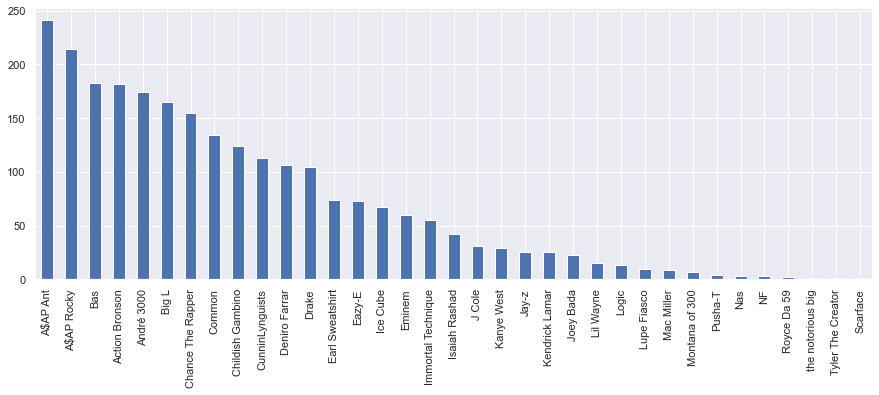

In [17]:
history.artist.value_counts().plot(kind='bar',figsize=(15, 5), label="artists");

**We have a disproptionate focus on certain artists**
If we have 40 artists and we pick out groups of 4 and of those 4 only is the target then we are essetially reducing our sample of the entire population to only a limited amount. 

1. So for starters how many groups of distinct groups of four could we have?
2. How many did we have?
3. What is the relationship to the total that we could have had?

In [18]:
fartists=len(['A$AP Ant', 'A$AP Rocky', 'Action Bronson', 'André 3000', 'Bas',
       'Big L', 'Chance The Rapper', 'Childish Gambino', 'Common',
       'CunninLynguists', 'Deniro Farrar', 'Drake', 'Earl Sweatshirt',
       'Eazy-E', 'Eminem', 'Ice Cube', 'Immortal Technique',
       'Isaiah Rashad', 'J Cole', 'Jay-z', 'Joey Bada', 'Kanye West',
       'Kendrick Lamar', 'Lil Wayne', 'Logic', 'Lupe Fiasco',
       'Mac Miller', 'Montana of 300', 'Nas', 'NF', 'Pusha-T',
       'Royce Da 59', 'Scarface', 'Talib Kweli', 'the notorious big',
       'Tyler The Creator', '2pac', 'cardib', 'dmx', 'missyelliott'])
num_fart=comb(fartists, 4)
listy = os.listdir('./data/') 
number_files = len(listy)


In [19]:
print(f'For Question number 1: 4 unique --that means that \
there might be redundant expirements that are in the folder \
because the same artist are on them-- out of 40: we {num_fart}')

For Question number 1: 4 unique --that means that there might be redundant expirements that are in the folder because the same artist are on them-- out of 40: we 91390.0


In [20]:
print(f'For Question number 2: {number_files} combinations')

For Question number 2: 2469 combinations


In [21]:
print(f'For Question number 3: {round(number_files/(num_fart/100),2)}% of the total combinations')

For Question number 3: 2.7% of the total combinations


## Lets look around at what we have

This where we can get a sense of what is taking place in our results

Some of the model results did not come in lets clear them out 

In [22]:
history = history[history['accuracy'] > .1] 
history = history[history['other_score'] > .1]
history = history[history['target_score'] > .1]

In [23]:
history.describe()

,accuracy,other_score,target_score
count,2306.000000,2306.000000,2306.000000
mean,0.811150,0.813117,0.805587
std,0.046728,0.045054,0.087109
min,0.643668,0.703145,0.111111
25%,0.782744,0.785820,0.755952
50%,0.808426,0.810015,0.805176
75%,0.830904,0.831052,0.849213
max,0.978808,1.000000,1.000000


In [24]:
history.head()

,accuracy,artist,other_score,target_score
0,0.901585,A$AP Ant,0.900726,0.974359
1,0.882524,A$AP Ant,0.881832,0.920000
2,0.910488,A$AP Ant,0.909660,1.000000
3,0.911789,A$AP Ant,0.910851,1.000000
4,0.907598,A$AP Ant,0.906944,0.972222


In [25]:
history.shape

(2306, 4)

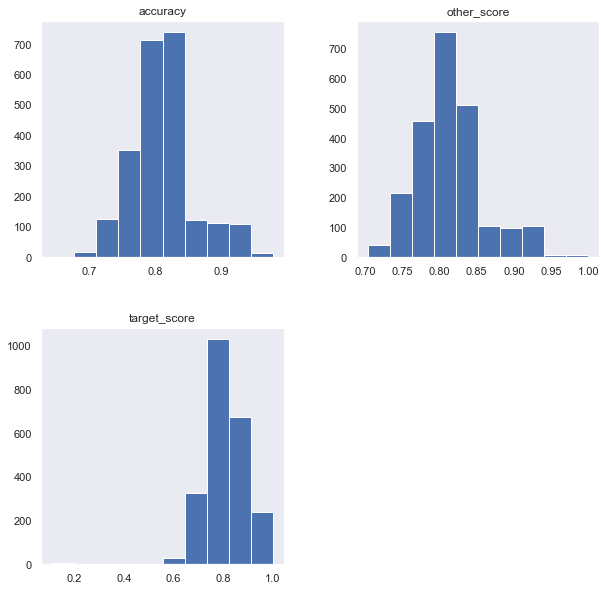

In [26]:
history.hist(figsize=(10,10), grid=False);

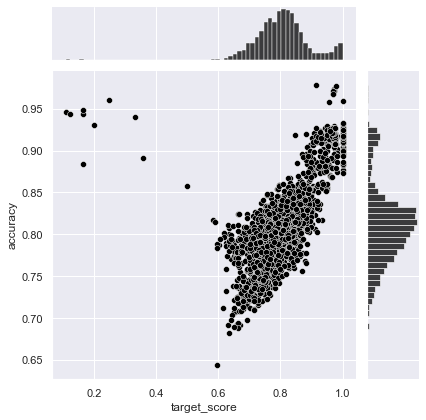

In [27]:
sns.jointplot(x=history['target_score'], y=history['accuracy'], kind="scatter", color="black");

Groupby Artist get averages and Sort by values in descending 

In [28]:
history.groupby("artist").mean().sort_values(['accuracy','other_score','target_score'],ascending=False).head(10)

,accuracy,other_score,target_score
artist,,,
the notorious big,0.978808,0.980339,0.914286
Tyler The Creator,0.967816,0.975000,0.967589
André 3000,0.927757,0.929911,0.306962
A$AP Ant,0.903689,0.902890,0.957783
NF,0.854501,0.866469,0.798050
Earl Sweatshirt,0.834113,0.831857,0.878353
Eazy-E,0.826692,0.829399,0.828266
Isaiah Rashad,0.822769,0.822893,0.814503
Big L,0.817312,0.815728,0.825776


now lets visualize that

In [29]:
med_hist=history.groupby("artist").median()
mean_hist=history.groupby("artist").mean()

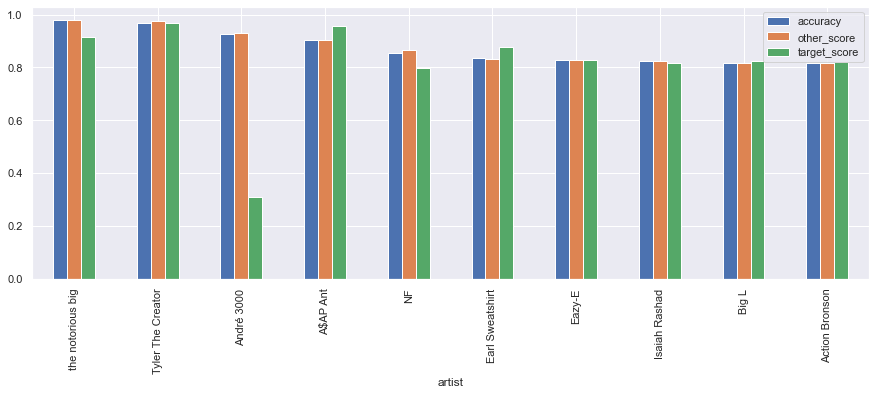

In [30]:
history.groupby("artist").mean().sort_values(['accuracy','other_score','target_score'],ascending=False).head(10).plot(kind='bar',figsize=(15, 5), label="artists");

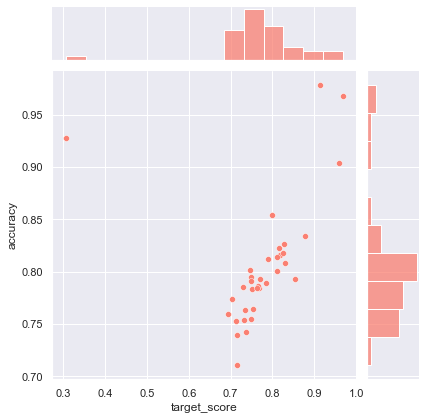

In [31]:
sns.jointplot(x=mean_hist['target_score'], y=mean_hist['accuracy'], kind="scatter", color="salmon");

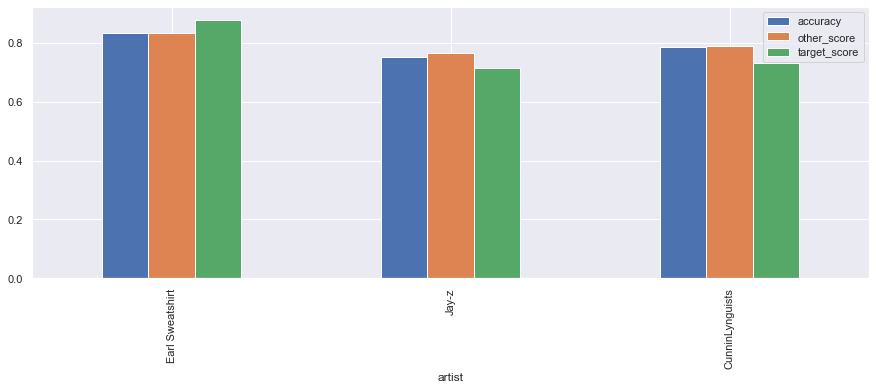

In [32]:
history.groupby("artist").mean().sample(3).plot(kind='bar',figsize=(15, 5), label="artists");

## Now the Median

In [33]:
history.groupby("artist").median().sort_values(['accuracy','other_score','target_score'],ascending=False).head(10)

,accuracy,other_score,target_score
artist,,,
the notorious big,0.978808,0.980339,0.914286
Tyler The Creator,0.967816,0.975000,0.967589
André 3000,0.943436,0.945408,0.200000
A$AP Ant,0.909684,0.909116,0.969697
NF,0.857663,0.867178,0.796480
Earl Sweatshirt,0.846317,0.846073,0.874508
Eazy-E,0.832493,0.831893,0.836237
Isaiah Rashad,0.831855,0.832679,0.808761
Bas,0.823675,0.823228,0.809524


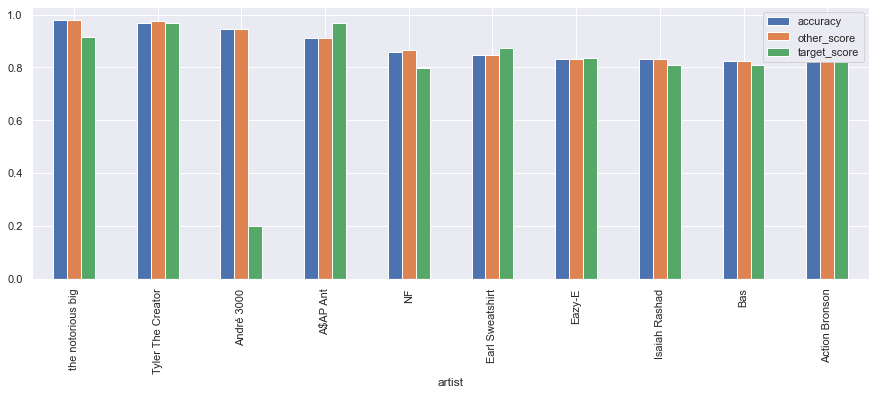

In [34]:
history.groupby("artist").median().sort_values(['accuracy','other_score','target_score'],ascending=False).head(10).plot(kind='bar',figsize=(15, 5), label="artists");

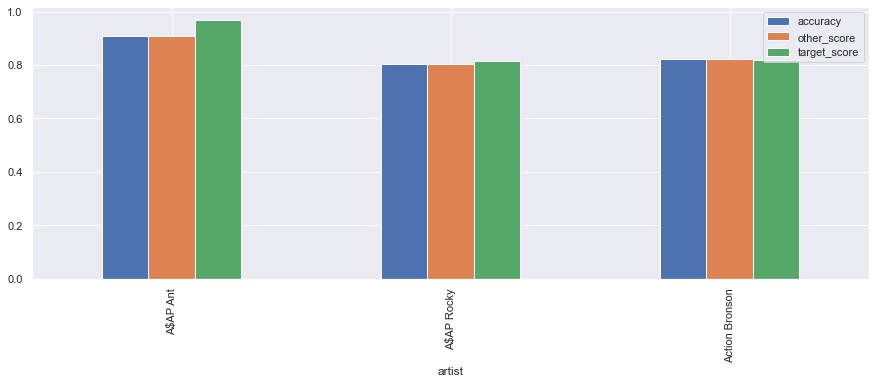

In [35]:
history.groupby("artist").median().head(3).plot(kind='bar',figsize=(15, 5), label="artists");

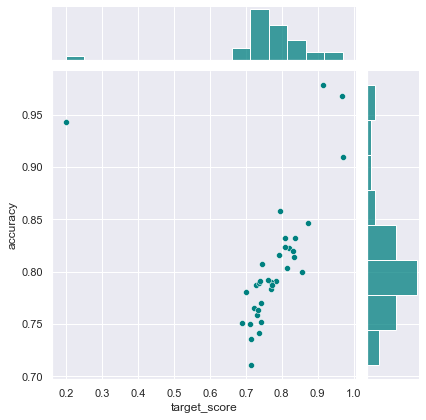

In [36]:
sns.jointplot(x=med_hist['target_score'], y=med_hist['accuracy'], kind="scatter", color="teal");

## Lets Visualize a bit deeper to understand what we have here 

Lets look at our averages

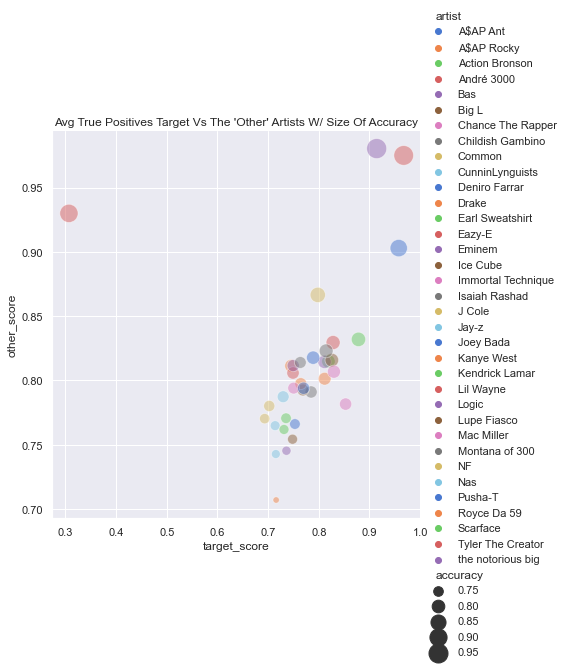

In [37]:
sns.relplot(x="target_score", y="other_score", hue="artist", size="accuracy",
            sizes=(40, 400), alpha=.5, palette="muted",
            height=6, data=mean_hist);
plt.title("Avg True Positives Target Vs The 'Other' Artists W/ Size Of Accuracy", fontsize=12);

Our Medians

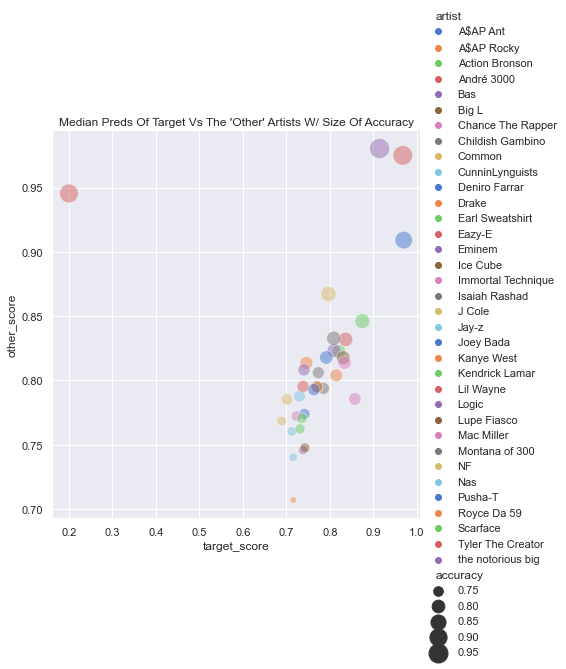

In [38]:
sns.relplot(x="target_score", y="other_score", hue="artist", size="accuracy",
            sizes=(40, 400), alpha=.5, palette="muted",
            height=6, data=med_hist);
plt.title("Median Preds Of Target Vs The 'Other' Artists W/ Size Of Accuracy", fontsize=12);

## This should be less overwhelming now.

Bring on the bubbles.

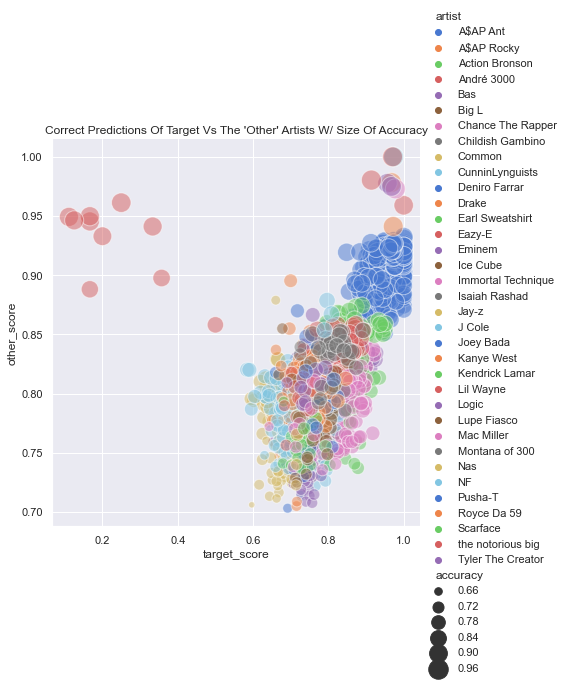

In [39]:
sns.relplot(x="target_score", y="other_score", hue="artist", size="accuracy",
            sizes=(40, 400), alpha=.5, palette="muted",
            height=6, data=history);
plt.title("Correct Predictions Of Target Vs The 'Other' Artists W/ Size Of Accuracy", fontsize=12);

## Do You See it?
There is one distinguishable set of bubbles. Let us take a deeper look

One artist...
A$AP Ant is distinguished in terms of both consistency of scoring highly

In [40]:
ant=history[(history.artist== "")]
ant.describe()

,accuracy,other_score,target_score
count,241.000000,241.000000,241.000000
mean,0.903689,0.902890,0.957783
std,0.018490,0.019017,0.037473
min,0.841584,0.833946,0.848485
25%,0.892355,0.890935,0.930233
50%,0.909684,0.909116,0.969697
75%,0.917240,0.916646,1.000000
max,0.932871,0.932510,1.000000


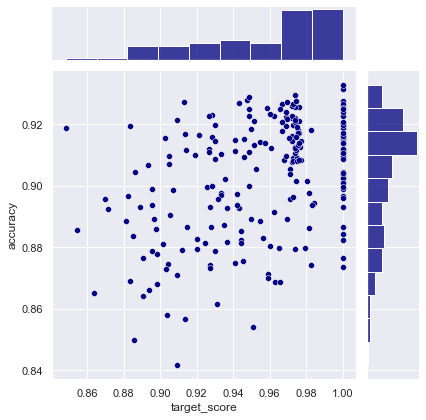

In [41]:
sns.jointplot(x=ant['target_score'], y=ant['accuracy'], kind="scatter", color="navy");

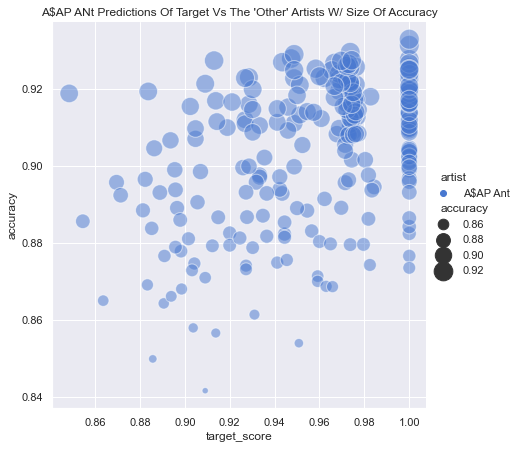

In [42]:
sns.relplot(x="target_score", y="accuracy", hue="artist", size="accuracy",
            sizes=(40, 400), alpha=.5, palette="muted",
            height=6, data=ant);
plt.title("A$AP ANt Predictions Of Target Vs The 'Other' Artists W/ Size Of Accuracy", fontsize=12);

Let double check and see how A$AP Ant faired to the other Artists.
We already know in our expirement he has a large presence in the population

In [43]:
df_ant=pd.read_csv('./assets/averages.csv')
df_ant[(df_ant.artist== "A$AP Ant")]

,artist,length,number_words,expl_bool,total_expl,grp_1,grp_2,tb_polarity,tb_subjectivity,vader_neg,vader_neu,vader_pos,compound
1,A$AP Ant,39.019856,8.0,0.296931,0.33213,0.050542,0.09296,0.002082,0.191279,0.127984,0.803171,0.067035,-0.099717


Lets see how he compares to the average to the rest of the group

In [44]:
df_ant.describe()

,length,number_words,expl_bool,total_expl,grp_1,grp_2,tb_polarity,tb_subjectivity,vader_neg,vader_neu,vader_pos,compound
count,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000
mean,83.512208,17.375048,0.253441,0.513440,0.092527,0.148925,0.004218,0.272669,0.116000,0.784382,0.099573,-0.048691
std,120.477999,25.242948,0.150786,1.005164,0.172741,0.320428,0.028571,0.059778,0.026054,0.025408,0.016750,0.099054
min,39.012723,8.000000,0.020170,0.000000,0.000000,0.000000,-0.094091,0.191279,0.051667,0.680300,0.067035,-0.414667
25%,43.217275,8.916800,0.171609,0.165461,0.033873,0.048404,-0.012171,0.249124,0.100898,0.776497,0.089291,-0.091976
50%,44.348202,9.277240,0.208193,0.208129,0.049976,0.075310,0.011077,0.258302,0.114233,0.790201,0.097999,-0.032595
75%,46.259814,9.564497,0.308506,0.343424,0.060214,0.113857,0.017698,0.266912,0.136955,0.797703,0.107321,-0.005799
max,513.051546,108.917526,0.775000,4.675000,0.783505,1.855670,0.075978,0.472193,0.187425,0.833294,0.137501,0.154588


Further lexicon analysis of A$ap Ant shows no evidence why he is distinguished from the rest.

Words of wisdom:
## You already know what it is 
--**A$AP ANT**

## Now lets look at another artist 

In [48]:
df_ant=pd.read_csv('./assets/averages.csv')
df_ant[(df_ant.artist== "André 3000")]

,artist,length,number_words,expl_bool,total_expl,grp_1,grp_2,tb_polarity,tb_subjectivity,vader_neg,vader_neu,vader_pos,compound
4,André 3000,39.012723,8.318066,0.025445,0.007634,0.002545,0.002545,0.053356,0.244188,0.051667,0.810858,0.137501,0.110482


In [46]:
a3000=history[(history.artist== "André 3000")]
a3000.describe()

,accuracy,other_score,target_score
count,11.000000,11.000000,11.000000
mean,0.927757,0.929911,0.306962
std,0.034096,0.033460,0.258066
min,0.857300,0.858086,0.111111
25%,0.911257,0.915271,0.166667
50%,0.943436,0.945408,0.200000
75%,0.947138,0.949529,0.345238
max,0.960408,0.961261,1.000000


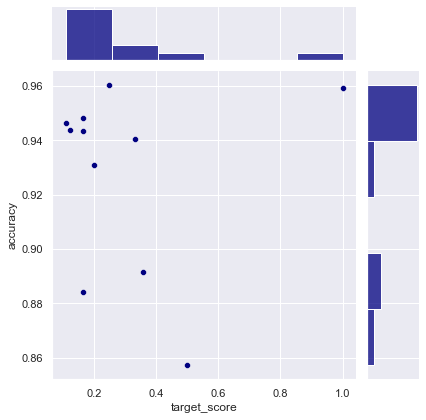

In [47]:
sns.jointplot(x=a3000['target_score'], y=a3000['accuracy'], kind="scatter", color="navy");

## Getting back to where we were

Our problem statement was:

**Can Natural Language Processing predict what artist is associated with a set of transcribed lyrics?**

If our null hypothesis was: "NLP can not tell the difference between one rapper's internet transcribed lyrics from another rappers internet transcribed lyrics"

and

If our alternative hypothesis was: "NLP can tell the difference between one rapper from another internet transcribed lyrics"

In real world data application, it can be puzzling whether a binary decision problem should be formulated as hypothesis testing or a binary classification.

So here is what formuliacly what Accuracy is equal to:

**(TN + TP)/(TN+TP+FN+FP) = (Number of correct assessments)/Number of all assessments)**

in other words
(Correct Others + Correct Targets)/(Correct and Inncorrect for both the others and the target groups)

**So yes NLP can tell the difference between one rapper from another internet transcribed lyrics**

However, the true positive rate(TPR) against false positive rate (FPR) can not be measured, where
**TPR= TP/(TP+FN)** And **FPR = FP/(FP+TN)** because we have neglected everything but the true positive.

This is a high specificity test. We have pretty much sacrificed sensitivity for the sake of a quick answer.

So if this was a health diagnostic test we would be neglecting the portions of our results that we accurately got right that were not positive and both of the ones we got wrong. A test with high sensitivity tends to capture
all possible positive conditions without missing anyone. Thus a test with high sensitivity is often used to screen for
diseases. We have a the luxury of testing something that is not in need of a deeper explanation. Should we need that we must account for the missing factors.

The trade off here is simple:
1. Allows the expirement to happen quickly only dealing with two things.
2. The positive results and the level by which they achieve that result is the accuracy,that can answer simple questions they however can not give a supportive analysis. 
3. With the restraints and limitations this is a good place to build on. 





So can we say for certain that binary classification model distinguished one artist from a collection.

So now let us up the stakes in our next episode of modeling.

In [54]:
#fig=px.scatter(history, x="accuracy", y="target_score", color="artist", size="other_score", size_max=10)
#fig.show()
#would be the way to display it regularly 
#fig.write_html("./html/history_results.html")
#This is for Github this allows plottly to populate from an Iframe.
IFrame(src='./html/history_results.html', width=900, height=500)

## Inspecting the Averages of the results with the EDA

In [52]:
combined_dfs=pd.merge(mean_hist,df_ant, how="inner", on="artist")

1. There appears to be a stronger connection with explitives according to this heat map our target score.
2. We also see a correlation between our other score and the vader negativity. 

While these points seem intersting **Causation is not Correlation** and these appearences still do not help us determine what can improve our model from increasing in sensitivity or specificity. 

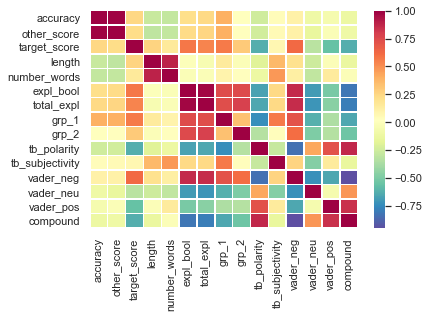

In [53]:
corr = combined_dfs.corr()
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns,linewidths=.5, cmap='Spectral_r');